# Activity 1: Correlated Random Walk - 1 Trajectory

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import wrapcauchy
from scipy.stats import levy_stable
from scipy.stats import cauchy
#from plotly
import plotly.graph_objects as go

## Vec2d Class

In [3]:
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

## Select rotations from a Cauchy distribution (scipy).

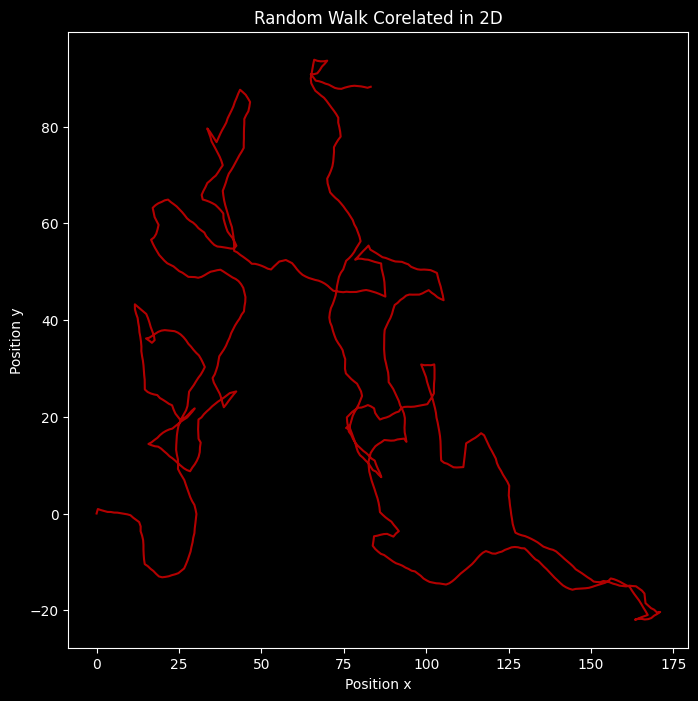

In [27]:
def correlated_random_walk_2D(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    x = np.zeros(n_steps)
    y = np.zeros(n_steps)
    # Random start direction.
    angle = np.random.uniform(0, 2 * np.pi)
    for i in range(1, n_steps):
        # Select a rotation from the Cauchy distribution.
        rotation = cauchy.rvs(scale=scale)
        # Update the direction using rotation.
        angle += rotation
        # Calculate the new displacement.
        x[i] = x[i-1] + np.cos(angle)
        y[i] = y[i-1] + np.sin(angle)
    return x, y
# Simulation parameters.
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the random walk.
x, y = correlated_random_walk_2D(n_steps, scale)
# Get a graphyc for the random walk.
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.plot(x, y, color = 'red', alpha=0.7)
plt.title("Random Walk Corelated in 2D")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Implement usign Vec2d class.

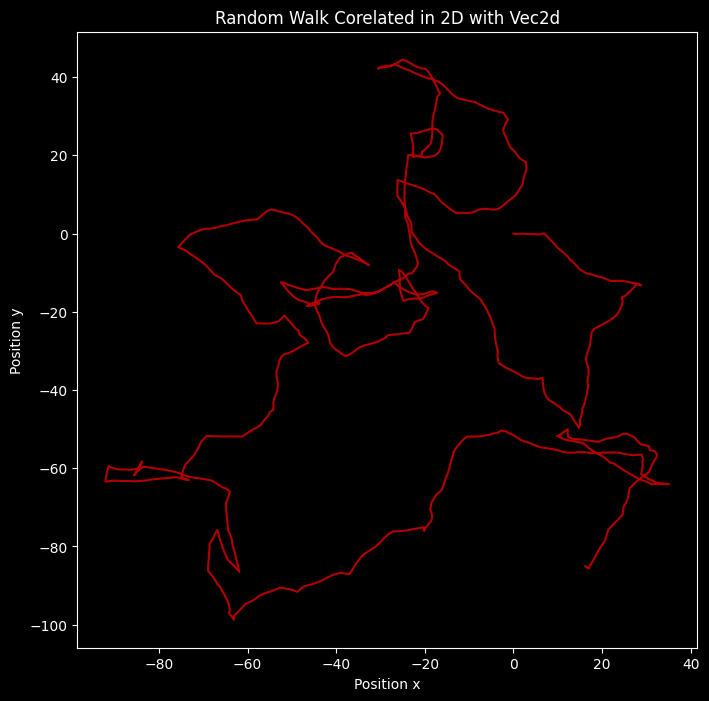

In [28]:
def correlated_random_walk_2D_vec2d(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    position = Vec2d(0, 0)
    direction = Vec2d(1, 0)
    # Arrays to save the trajectory
    trajectory_x = []
    trajectory_y = []
    for _ in range(n_steps):
        # Save the current position
        trajectory_x.append(position.x)
        trajectory_y.append(position.y)
        # Select a rotation from the Cauchy distribution.
        rotation_angle = cauchy.rvs(scale=scale)
        # Rotate the current position.
        direction = direction.rotated(rotation_angle)
        # Update the position.
        position += direction
    return trajectory_x, trajectory_y
# Simulation parameters.
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the random walk.
trajectory_x, trajectory_y = correlated_random_walk_2D_vec2d(n_steps, scale)
# Get a graphyc for the random walk.
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.plot(trajectory_x, trajectory_y, color = 'red', alpha=0.7)
plt.title("Random Walk Corelated in 2D with Vec2d")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Keep trajectory in a numpy array

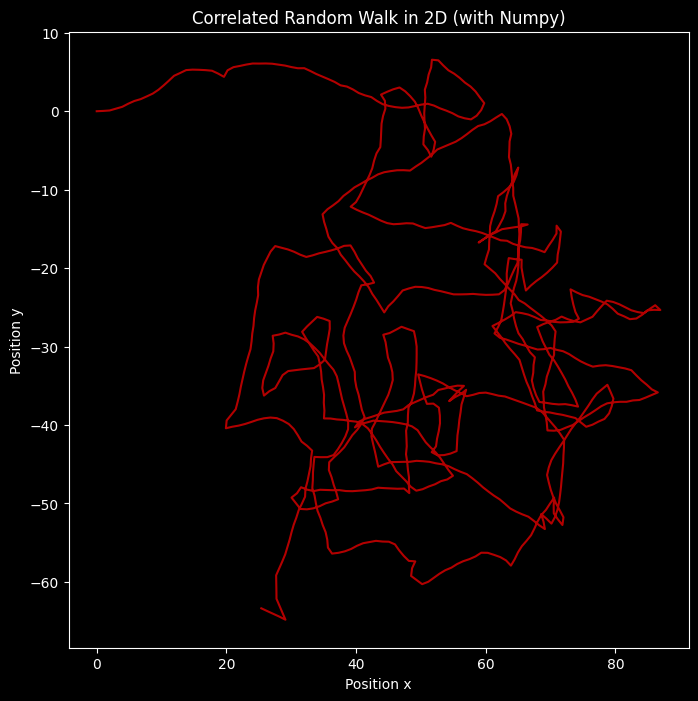

In [29]:
def correlated_random_walk_2D_numpy(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    trajectory = np.zeros((n_steps, 2))
    direction = np.array([1, 0])  # Unit vector in the x direction
    for i in range(1, n_steps):
        # Select a rotation from a Cauchy distribution
        rotation_angle = cauchy.rvs(scale=scale)
        # Calculate the sine and cosine of the rotation angle
        cos_theta = np.cos(rotation_angle)
        sin_theta = np.sin(rotation_angle)
        # Apply the rotation to the current direction
        new_direction = np.array([
            direction[0] * cos_theta - direction[1] * sin_theta,
            direction[0] * sin_theta + direction[1] * cos_theta
        ])
        # Update the position by adding the new direction to the current position
        trajectory[i] = trajectory[i - 1] + new_direction
        # Update the current direction
        direction = new_direction
    return trajectory
# Parameters for the simulation
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the correlated random walk
trajectory = correlated_random_walk_2D_numpy(n_steps, scale)
# Get a graphyc for the random walk.
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
plt.plot(trajectory[:, 0], trajectory[:, 1], color = 'red', alpha=0.7)
plt.title("Correlated Random Walk in 2D (with Numpy)")
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.show()

## Visualize trajectory using plotly - 2D projection

In [18]:
def correlated_random_walk_2D_numpy(n_steps, scale=0.1):
    # n_steps: number of steps in the random walk
    # scale: scale parameter for the Cauchy distribution that controls the "spread" of the rotations
    # Initialize the position and initial direction
    trajectory = np.zeros((n_steps, 2))
    direction = np.array([1, 0])  # Unit vector in the x direction
    for i in range(1, n_steps):
        # Select a rotation from a Cauchy distribution
        rotation_angle = cauchy.rvs(scale=scale)
        # Calculate the sine and cosine of the rotation angle
        cos_theta = np.cos(rotation_angle)
        sin_theta = np.sin(rotation_angle)
        # Apply the rotation to the current direction
        new_direction = np.array([
            direction[0] * cos_theta - direction[1] * sin_theta,
            direction[0] * sin_theta + direction[1] * cos_theta
        ])
        # Update the position by adding the new direction to the current position
        trajectory[i] = trajectory[i - 1] + new_direction
        # Update the current direction
        direction = new_direction
    return trajectory
# Parameters for the simulation
n_steps = 1000
scale = 0.1  # This parameter can be modified to change the simulation.
# Generate the correlated random walk
trajectory = correlated_random_walk_2D_numpy(n_steps, scale)
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=trajectory[:, 0], 
    y=trajectory[:, 1], 
    mode='lines',
    line=dict(color='red', width=2),
    name='Trajectory'
))
# Customize the layout
fig.update_layout(
    title="Correlated Random Walk in 2D (using Plotly)",
    xaxis_title="Position x",
    yaxis_title="Position y",
    showlegend=False,
    autosize=False,
    width=800,
    height=800,
    template="plotly_dark"
)
# Display the plot
fig.show()

# Activity 5: Correlated Random Walk - Vec2d - N Trajectories

## Generate as many CRW trajectories as specified on a control variable n_traj.
## Each of the trajectories should be generated using a unique Cauchy coefficient.

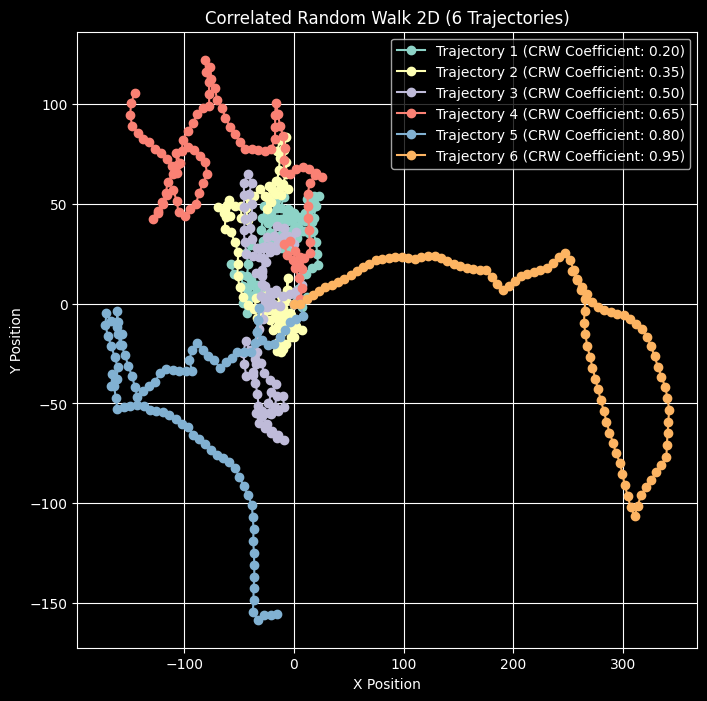

In [21]:
# Init parameters
n_steps = 100
s_pos = np.array([0, 0])
speed = 6
n_traj = 6  # Number of trajectory to be generated.
CRW_coefficient = [0.2, 0.35, 0.5, 0.65, 0.8, 0.95] #This are the CRW vlaues to used for the figures.  
plt.style.use('dark_background')
plt.figure(figsize=(8, 8))
fig_wrapcauchy_pdf = go.Figure()
for j in range(n_traj):
    # Init velocity vector
    velocity = np.array([speed, 0])
    # Matrix for the Correlated Random Walk for a single trajectory
    CRW_2d = np.ones((n_steps, 2)) * s_pos
    for i in range(1, n_steps):
        # Generate a random angle following a wrapped Cauchy distribution
        turn_angle = wrapcauchy.rvs(CRW_coefficient[j])
        # Rotate the velocity vector by the turn angle
        rotation_matrix = np.array([[np.cos(turn_angle), -np.sin(turn_angle)],
                                    [np.sin(turn_angle),  np.cos(turn_angle)]])
        velocity = np.dot(rotation_matrix, velocity)
        # Update to new position
        CRW_2d[i] = CRW_2d[i-1] + velocity
    # Plot the trajectory
    plt.plot(CRW_2d[:, 0], CRW_2d[:, 1], '-o', label=f'Trajectory {j+1} (CRW Coefficient: {CRW_coefficient[j]:.2f})')
    #Generate the PDF of the wrapped Cauchy for this trajectory
    resolution = 200
    aux_domain = np.linspace(0, 2 * np.pi, resolution)
    wrapcauchy_pdf = np.array([wrapcauchy.pdf(i, CRW_coefficient[j]) for i in aux_domain])
    # Add a graphyc to the figure.
    fig_wrapcauchy_pdf.add_trace(go.Scatter(
         x=aux_domain,
         y=wrapcauchy_pdf,
         marker=dict(size=2),
         line=dict(width=2),
         mode='lines',
         name=f'Trajectory {j+1} (CRW Coefficient: {CRW_coefficient[j]:.2f})',
         showlegend=True
    ))
plt.title(f'Correlated Random Walk 2D ({n_traj} Trajectories)')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.grid()
plt.legend()
plt.show()
fig_wrapcauchy_pdf.update_layout(title='Wrapped Cauchy Probability Density Function for Multiple Trajectories',
                                 xaxis_title='Angle (radians)',
                                 yaxis_title='Probability Density',
                                 template="plotly_dark")
fig_wrapcauchy_pdf.show()

## Implement usign Vec2d class.

## Keep the trajectories in a Pandas Data Frame.

## Visualize trajectories using plotly - 3D projection